# Module - 5

Random Forest Classifier

In [10]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [26]:
! pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 326.8 kB/s eta 0:00:01
   ------------- ------------------------- 81.9/235.6 kB 508.4 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/235.6 kB 708.1 kB/s eta 0:00:01
   ---------------------------- --------- 174.1/235.6 kB 748.1 kB/s eta 0:00:01
   --------------------------------- ---- 204.8/235.6 kB 731.4 kB/s eta 0:00:01
   --------------------------------- -

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
data=p.read_csv('churn.csv')
data.head()

,Customer ID,Gender,Age,Zip Code,Latitude,Longitude,Tenure in Months,Offer,Internet Type,Avg Monthly GB Download,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,93225,34.827662,-118.999073,9,NaN,Cable,16.0,Yes,One Year,Credit Card,65.6,593.30,0,974.81,Stayed
1,0003-MKNFE,Male,46,91206,34.162515,-118.203869,9,NaN,Cable,10.0,No,Month-to-Month,Credit Card,-4.0,542.40,10,610.28,Stayed
2,0004-TLHLJ,Male,50,92627,33.645672,-117.922613,4,Offer E,Fiber Optic,30.0,Yes,Month-to-Month,Bank Withdrawal,73.9,280.85,0,415.45,Churned
3,0011-IGKFF,Male,78,94553,38.014457,-122.115432,13,Offer D,Fiber Optic,4.0,Yes,Month-to-Month,Bank Withdrawal,98.0,1237.85,0,1599.51,Churned
4,0013-EXCHZ,Female,75,93010,34.227846,-119.079903,3,NaN,Fiber Optic,11.0,Yes,Month-to-Month,Credit Card,83.9,267.40,0,289.54,Churned


In [14]:
del data['Customer ID']
del data['Zip Code']
del data['Latitude']
del data['Longitude']

In [15]:
df=data.dropna()

In [16]:
df.drop(df.index[df['Customer Status'] == 'Joined'], inplace=True)

In [17]:
df = df.rename({'Tenure in Months': 'Tenure_in_Months', 'Internet Service': 'Internet_Service',
                'Internet Type': 'Internet_Type', 'Avg Monthly GB Download': 'Avg_Monthly_GB_Download',
                'Unlimited Data': 'Unlimited_Data', 'Payment Method': 'Payment_Method',
                'Monthly Charge': 'Monthly_Charge', 'Total Charges': 'Total_Charges',
                'Total Extra Data Charges': 'Total_Extra_Data_Charges', 'Customer Status': 'Customer_Status', 'Total Revenue':'Total_Revenue'}, axis=1)

In [21]:
df.columns

Index(['Gender', 'Age', 'Tenure_in_Months', 'Offer', 'Internet_Type',
       'Avg_Monthly_GB_Download', 'Unlimited_Data', 'Contract',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges',
       'Total_Extra_Data_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Offer', 'Internet_Type', 'Unlimited_Data', 'Contract', 'Payment_Method', 'Customer_Status','Gender']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [23]:
df.tail()

,Gender,Age,Tenure_in_Months,Offer,Internet_Type,Avg_Monthly_GB_Download,Unlimited_Data,Contract,Payment_Method,Monthly_Charge,Total_Charges,Total_Extra_Data_Charges,Total_Revenue,Customer_Status
7035,0,20,7,4,2,42.0,1,1,1,94.05,633.45,0,888.88,1
7036,0,53,1,4,2,9.0,1,0,1,70.15,70.15,0,112.24,0
7038,0,20,13,3,1,59.0,1,1,1,55.15,742.90,0,1349.74,1
7039,1,40,22,3,2,17.0,1,0,0,85.10,1873.70,0,2230.10,0
7041,1,21,67,0,0,58.0,1,2,1,67.85,4627.65,0,4769.69,1


In [24]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Customer_Status', axis=1)
#Response variable
y = df.loc[:,'Customer_Status']

In [28]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros =RandomUnderSampler()
x_ros,y_ros=ros.fit_resample(X,y)
print("OUR DATASET COUNT         : ", Counter(y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({1: 1620, 0: 757})
OVER SAMPLING DATA COUNT  :  Counter({0: 757, 1: 757})


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(X_train))
print("Number of test dataset     : ", len(X_test))
print("Total number of dataset    : ", len(X_train)+len(X_test))

Number of training dataset :  1059
Number of test dataset     :  455
Total number of dataset    :  1514


K Nearest Neighbor

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Training Process

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predicted_rfc = rfc.predict(X_test)

Getting Accuracy

In [33]:
accuracy = accuracy_score(y_test,predicted_rfc)
print('Accuracy of Random Forest Classifier is: ',accuracy*100)

Accuracy of Random Forest Classifier is:  79.34065934065934


Finding Classification Report

In [34]:
cr = classification_report(y_test,predicted_rfc)
print('Classification report\n---------------------\n',cr)

Classification report
---------------------
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       227
           1       0.79      0.79      0.79       228

    accuracy                           0.79       455
   macro avg       0.79      0.79      0.79       455
weighted avg       0.79      0.79      0.79       455



Finding Confusion Matrix

In [35]:
cm = confusion_matrix(y_test,predicted_rfc)
print('Confusion matrix\n----------------\n',cm)

Confusion matrix
----------------
 [[180  47]
 [ 47 181]]


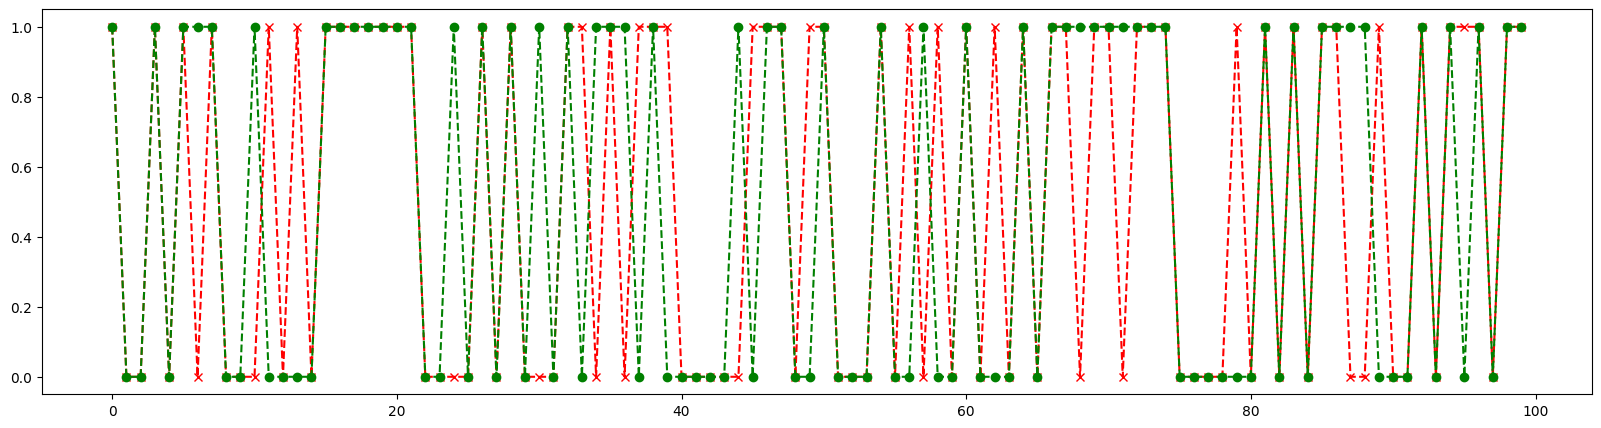

In [36]:
DF = p.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_rfc
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

Saving Model

In [37]:
import joblib
joblib.dump(rfc,'RFC.pkl')

['RFC.pkl']